11490434/11490434 [==============================] - 0s 0us/step


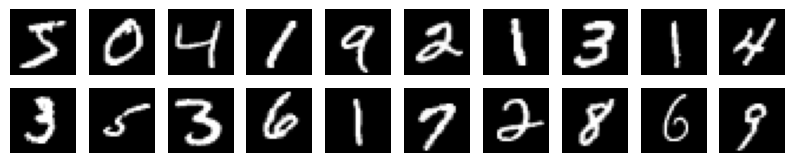

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio as psnr

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

plt.figure(figsize=(10, 10))
for i in range(0, 20):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [ ]:
import numpy as np
print(f"Number of training images: {X_train.shape[0]}")
print(f"Number of test images: {X_test.shape[0]}")
print(f"Shape of a single training image: {X_train.shape[1:]}")
print(f"Shape of a single test image: {X_test.shape[1:]}")

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("Training label counts:")
for label, count in zip(unique_train, counts_train):
    print(f"Label {label}: {count}")

print("Test label counts:")
for label, count in zip(unique_test, counts_test):
    print(f"Label {label}: {count}")

Number of training images: 60000
Number of test images: 10000
Shape of a single training image: (28, 28)
Shape of a single test image: (28, 28)
Training label counts:
Label 0: 5923
Label 1: 6742
Label 2: 5958
Label 3: 6131
Label 4: 5842
Label 5: 5421
Label 6: 5918
Label 7: 6265
Label 8: 5851
Label 9: 5949
Test label counts:
Label 0: 980
Label 1: 1135
Label 2: 1032
Label 3: 1010
Label 4: 982
Label 5: 892
Label 6: 958
Label 7: 1028
Label 8: 974
Label 9: 1009


In [ ]:
# Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

X_b = np.c_[np.ones((X_train_flattened.shape[0], 1)), X_train_flattened]

In [ ]:
XTX = X_b.T.dot(X_b)

XTy = X_b.T.dot(X_train_flattened)

lambda_identity = 0.01 * np.identity(XTX.shape[0])
XTX_reg = XTX + lambda_identity

XTX_inv = np.linalg.inv(XTX_reg)

# Compute beta using the normal equation with regularization
beta = XTX_inv.dot(XTy)

In [ ]:

noise_factor = 0.2
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

X_test_noisy_flattened = X_test_noisy.reshape(X_test.shape[0], -1)
X_test_noisy_b = np.c_[np.ones((X_test_noisy_flattened.shape[0], 1)), X_test_noisy_flattened]

Mean Squared Error: 0.0190
Peak Signal-to-Noise Ratio: 17.2111 dB


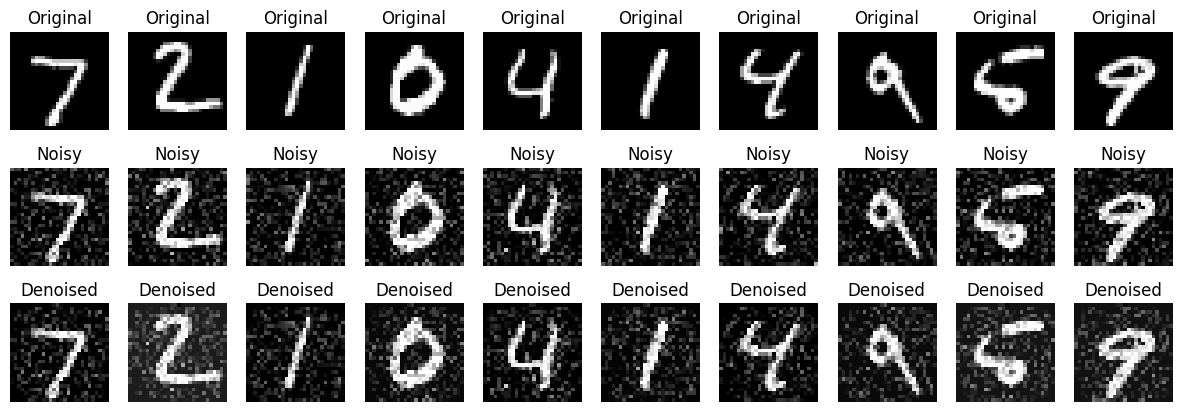

In [ ]:
# Predict denoised images using the learned beta coefficients
y_test_denoised_flattened = X_test_noisy_b.dot(beta)

y_test_denoised = y_test_denoised_flattened.reshape(X_test.shape)

# Compute Mean Squared Error and PSNR
mse = mean_squared_error(X_test.flatten(), y_test_denoised.flatten())
psnr_value = psnr(X_test, y_test_denoised)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Peak Signal-to-Noise Ratio: {psnr_value:.4f} dB")


def plot_images(original, noisy, denoised, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i], cmap='gray')
        plt.axis('off')
        plt.title('Original')

        plt.subplot(3, num_images, i + num_images + 1)
        plt.imshow(noisy[i], cmap='gray')
        plt.axis('off')
        plt.title('Noisy')

        plt.subplot(3, num_images, i + 2 * num_images + 1)
        plt.imshow(denoised[i], cmap='gray')
        plt.axis('off')
        plt.title('Denoised')

    plt.show()

plot_images(X_test, X_test_noisy, y_test_denoised)
